# Обзорный анализ рынка игр

## Источник:
Исходный файл для проведения аналитики был скачан с сайта Kaggle.
Ссылка на файл: https://www.kaggle.com/gregorut/videogamesales

##  Описание датасета
Исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

###  1. Загрузим необходимые библиотеки, файл, сделаем предобработку данных и первичный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

%matplotlib inline

In [2]:
df_games = pd.read_csv('vgsales.csv')
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


   ###### Краткая информация по датафрейму:

In [3]:
df_games.info()
df_games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Для удобства приведем имен колонок к нижнему регистру
df_games.columns = df_games.columns.str.lower()

In [5]:
# Проверяем есть ли значительные пропуски в данных
df_games.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

### 2. Проведем анализ игр по годам:

In [6]:
# Присвоим новую переменную и удалим строки, где отсутствует год выпуска
games_per_year = df_games.copy()
games_per_year = games_per_year.dropna(axis='index', how='any', subset=['year'])
# Дополнительно приведем год к целочисленному формату
games_per_year['year'] = games_per_year['year'].astype(int)
games_per_year.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
# Сгруппируем датафрейм по количеству игр, выходивших каждый год
# Также удалим 2017 и 2020 года в датафрейме, т.к из данных видно, что информация явно не обновлялась
count_games = games_per_year.groupby(by='year', as_index=False).agg({'name': 'count'}) \
                                                 .rename(columns={'name': 'count_games'}) \
                                                 .query('year < 2017')
count_games

,year,count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0, 0.5, 'Количество игр')

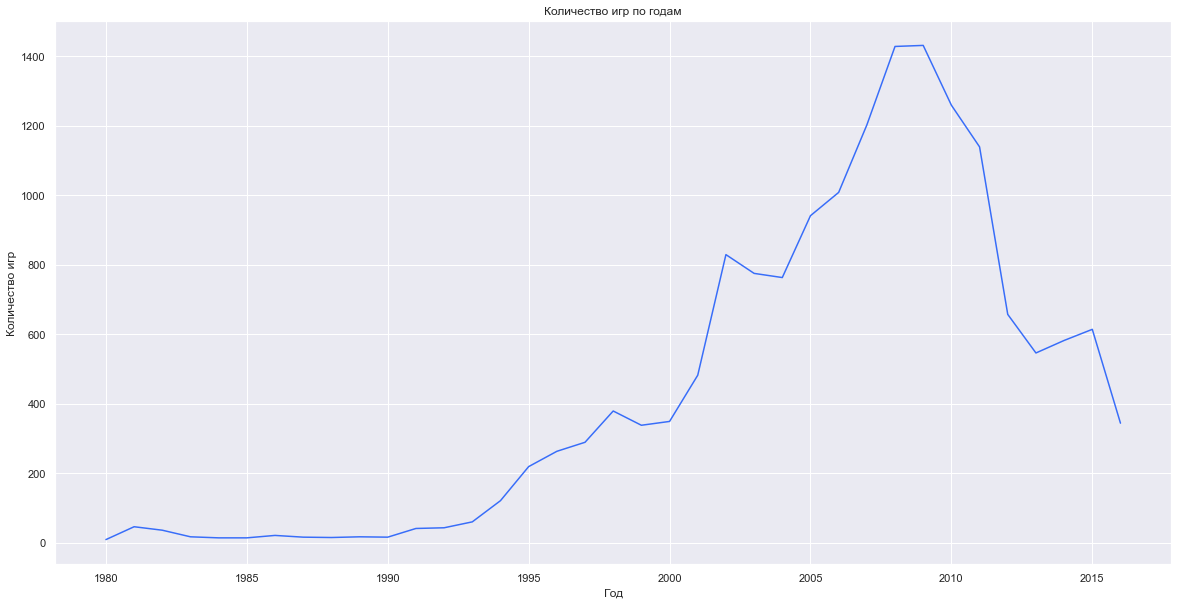

In [8]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid", palette='rainbow')
sns.lineplot(data=count_games, x='year', y='count_games')
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')

# Исходя из графика можно сделать вывод, что до 2008-2009 гг. наблюдался значительный рост количества
# игр, далее происходит постепенный спад

In [9]:
games_sales = games_per_year.groupby(by='year', as_index=False).agg({'global_sales': 'sum'}) \
                                               .query('year < 2017')

Text(0, 0.5, 'Сумма продаж')

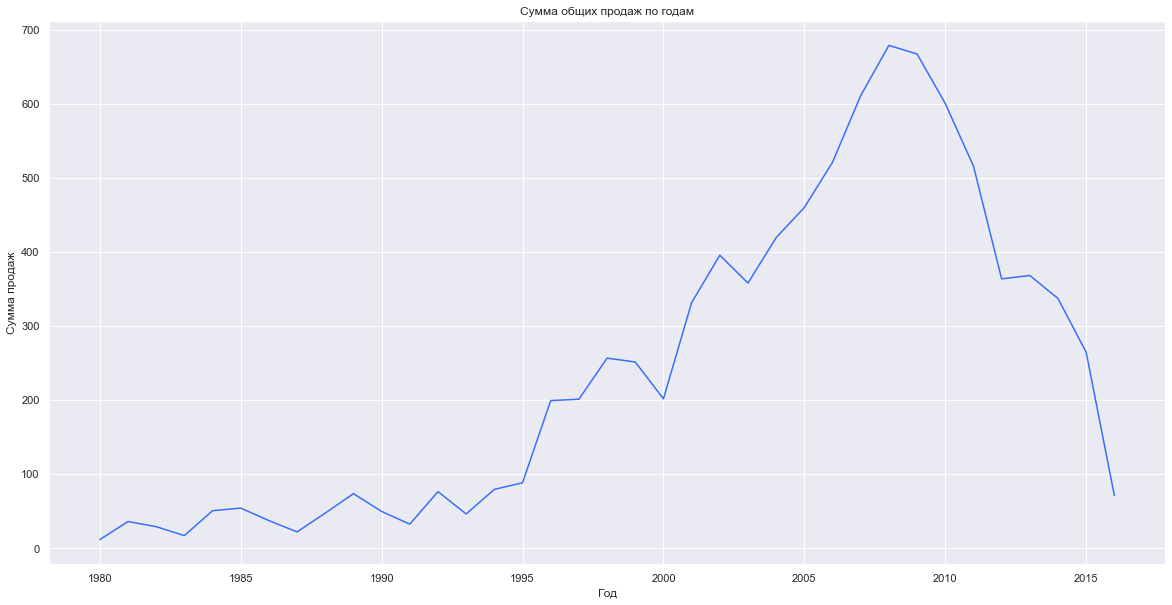

In [10]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid", palette='rainbow')
sns.lineplot(data=games_sales, x='year', y='global_sales')
plt.title('Сумма общих продаж по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')

# Аналогично и сумма продаж игр в денежном эквиваленте в мире показывает ту же тенденцию

### 3. Проведем анализ игр по годам:

,platform,global_sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


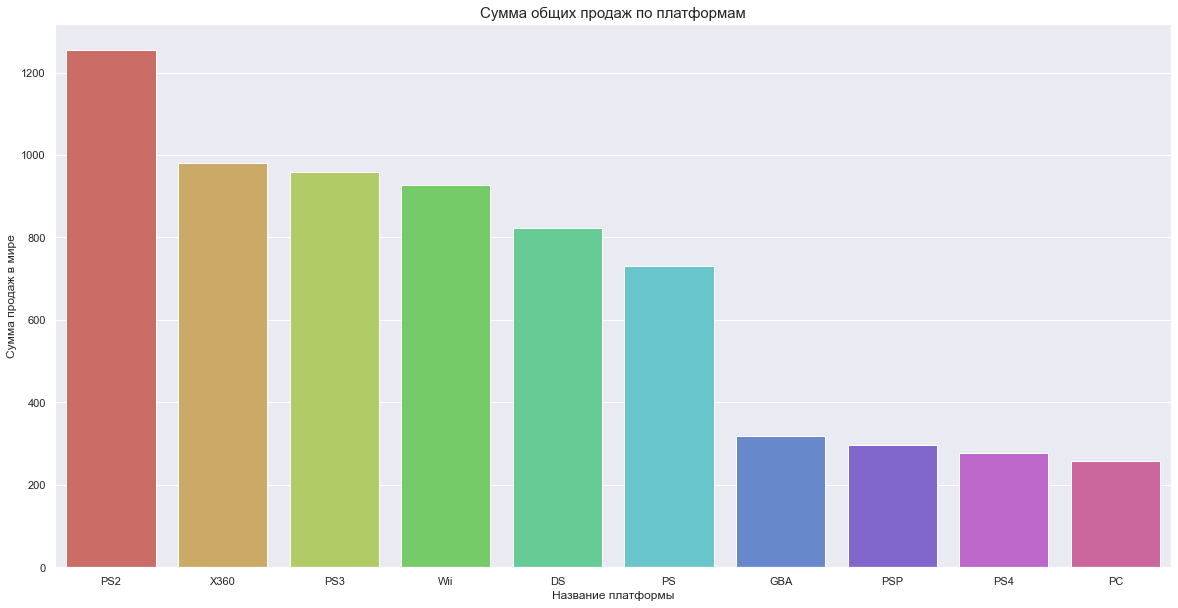

In [11]:
# Рассмотрим мировые продажи по платформам:
game_platform = df_games.groupby(by='platform', as_index=False).agg({'global_sales': 'sum'}) \
                                    .sort_values(by='global_sales', ascending=False)

# Визуализируем топ-10 платформ по продажам во всем мире

plt.figure(figsize=(20,10))
sns.barplot(
    x="platform", 
    y="global_sales", 
    palette='hls', 
    data=game_platform.head(10)
);
plt.title('Сумма общих продаж по платформам', fontdict = {'fontsize' : 15})
plt.xlabel('Название платформы')
plt.ylabel('Сумма продаж в мире')
game_platform.head(10)

Text(0, 0.5, 'Сумма продаж')

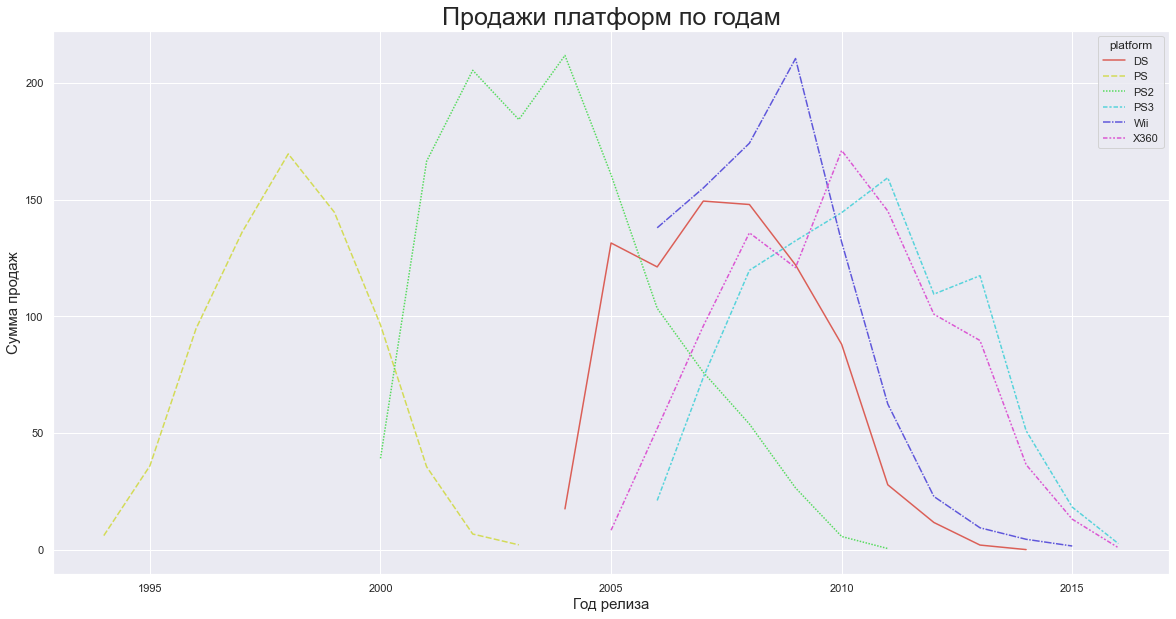

In [12]:
# Посмотрим сколько лет в среднем цикл существования платформы
# Для этого возьмем топ-6 самых популярных платформ из предыдущего графика и отобразим это  
# визуально на временной шкале

game_platform = df_games.groupby(by='platform').agg({'global_sales': 'sum'}) \
                                    .sort_values(by='global_sales', ascending=False)

platform_top = game_platform.query('global_sales>600').index

best_platforms = df_games.query('platform in @platform_top') \
                .pivot_table(index='year', columns='platform', values='global_sales', aggfunc='sum') \
                .loc[1994:2016]
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data = best_platforms, palette='hls')
plt.title('Продажи платформ по годам', fontdict = {'fontsize' : 25})
plt.xlabel('Год релиза', fontdict = {'fontsize' : 15})
plt.ylabel('Сумма продаж', fontdict = {'fontsize' : 15})

# Исходя из графика можем сделать вывод, что платформа существует в среднем 10 лет


In [13]:
# Также было бы интересно посмотреть топ платформ на разных континентах:

print('Продажи в Cеверной Америке по платформам')
print(df_games.groupby('platform', as_index=False).agg({'na_sales': 'sum'}) \
                      .sort_values(by='na_sales', ascending=False).reset_index(drop=True).head(5), end='\n\n')
print('Продажи в Европе по платформам')
print(df_games.groupby('platform', as_index=False).agg({'eu_sales': 'sum'}) \
                      .sort_values(by='eu_sales', ascending=False).reset_index(drop=True).head(5), end='\n\n')
print('Продажи в Японии по платформам')
print(df_games.groupby('platform', as_index=False).agg({'jp_sales': 'sum'}) \
                      .sort_values(by='jp_sales', ascending=False).reset_index(drop=True).head(5))

# Здесь наблюдается значительный разнобой: в Америке самая популярная система-'XBox 360',
# в Европе-'PS2', в Японии-'DS'

Продажи в Cеверной Америке по платформам
  platform  na_sales
0     X360    601.05
1      PS2    583.84
2      Wii    507.71
3      PS3    392.26
4       DS    390.71

Продажи в Европе по платформам
  platform  eu_sales
0      PS3    343.71
1      PS2    339.29
2     X360    280.58
3      Wii    268.38
4       PS    213.60

Продажи в Японии по платформам
  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      NES     98.65


Text(0.5, 1.0, 'Япония')

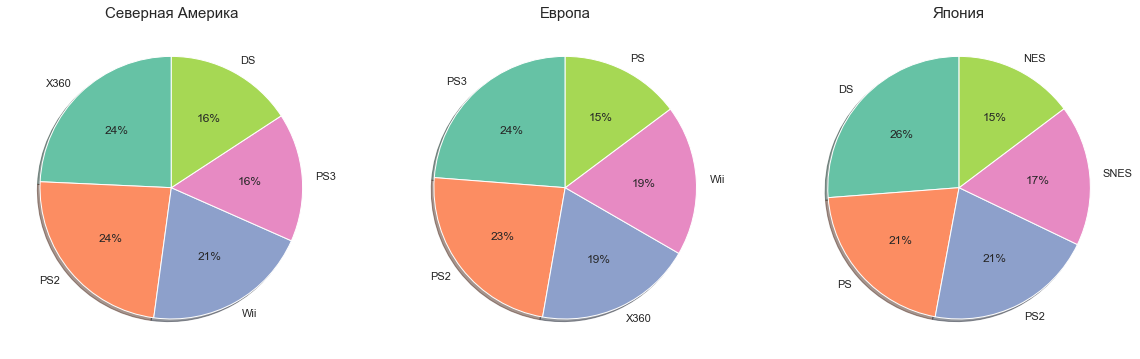

In [14]:
# Отобразим это на графиках


na_plat = df_games.groupby('platform', as_index=False).agg({'na_sales': 'sum'}) \
                      .sort_values(by='na_sales', ascending=False).reset_index(drop=True).head(5)
eu_plat = df_games.groupby('platform', as_index=False).agg({'eu_sales': 'sum'}) \
                      .sort_values(by='eu_sales', ascending=False).reset_index(drop=True).head(5)
jp_plat = df_games.groupby('platform', as_index=False).agg({'jp_sales': 'sum'}) \
                      .sort_values(by='jp_sales', ascending=False).reset_index(drop=True).head(5)
plt.subplot(1, 3, 1)
colors = sns.color_palette('Set2')[0:5]
plt.pie(data=na_plat, x = 'na_sales', labels = 'platform', colors = colors, autopct='%.f%%', shadow=True, startangle=90)
plt.title('Северная Америка', fontdict = {'fontsize' : 15})
plt.subplot(1, 3, 2)
plt.pie(data=eu_plat, x = 'eu_sales', labels = 'platform', colors = colors, autopct='%.f%%', shadow=True, startangle=90)
plt.title('Европа', fontdict = {'fontsize' : 15})
plt.subplot(1, 3, 3)
plt.pie(data=jp_plat, x = 'jp_sales', labels = 'platform', colors = colors, autopct='%.f%%', shadow=True, startangle=90)
plt.title('Япония', fontdict = {'fontsize' : 15})

### 4. Проведем анализ игр по жанрам:

In [15]:
dgame_genre = df_games.groupby(by=['genre'])['global_sales'].sum()
game_genre = data_genre.reset_index()
game_genre = data_genre.sort_values(by=['global_sales'], ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x="genre", y="global_sales", data=game_genre)
plt.title('Продажи игр по жанрам', fontdict = {'fontsize' : 25})
plt.xlabel('Жанр игр', fontdict = {'fontsize' : 15})
plt.ylabel('Сумма продаж', fontdict = {'fontsize' : 15})

NameError: name 'data_genre' is not defined

In [ ]:
# Построим график самого популярного жанра по каждому году


year_max_df = df_games.groupby(['year', 'genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["year", "count"], keep='last') \
                .reset_index(drop=True).query('year<2017')
genre = year_max_genre['genre'].values

plt.figure(figsize=(30, 15))
graph = sns.barplot(x='year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    graph.text(index, value + 5, str(genre[index] + '---' +str(value)), color='#000', size=17, rotation=90, ha="center")
    index += 1
plt.title('Самый популярный жанр по годам', fontdict = {'fontsize' : 30})
plt.xlabel('Год', fontdict = {'fontsize' : 20})
plt.ylabel('Количество', fontdict = {'fontsize' : 20})


# Исходя из графика можно сделать вывод, что с 1994 по 2002 самым популярным жанром был "Sport",
# далее безоговорочное лидерство за "Action"



In [ ]:
# Исходя из предыдущих выводов, можно построить график мировых продаж по жанрам и также убедиться,
# что самый популярный жанр -"Action", на втором месте - "Sports"


top_genres = df_games.groupby(by='genre', as_index=False).agg({'global_sales': 'sum'}) \
                                                    .sort_values(by='global_sales', ascending=False)

plt.figure(figsize=(30, 15))
sns.barplot(x="genre", y="global_sales", data=top_genres, palette="viridis")
plt.title('Самый популярный жанр по глобальным продажам', fontdict = {'fontsize' : 35})
plt.xlabel('Жанр', fontdict = {'fontsize' : 25})
plt.ylabel('Сумма продаж', fontdict = {'fontsize' : 25})

In [ ]:
# Дополнительно проверим топ жанры по продажам на разных континентах:

print('Продажи в Cеверной Америке по жанрам')
print(df_games.groupby('genre', as_index=False).agg({'na_sales': 'sum'}) \
                      .sort_values(by='na_sales', ascending=False).reset_index(drop=True).head(5), end='\n\n')
print('Продажи в Европе по жанрам')
print(df_games.groupby('genre', as_index=False).agg({'eu_sales': 'sum'}) \
                      .sort_values(by='eu_sales', ascending=False).reset_index(drop=True).head(5), end='\n\n')
print('Продажи в Японии по жанрам')
print(df_games.groupby('genre', as_index=False).agg({'jp_sales': 'sum'}) \
                      .sort_values(by='jp_sales', ascending=False).reset_index(drop=True).head(5))


# Если в Америке и Европе топ жанров по продажам особо не отличается, то в Японии на первом месте
# находится жанр ролевых игр

In [ ]:
# Отобразим это на графиках


na_gen = df_games.groupby('genre', as_index=False).agg({'na_sales': 'sum'}) \
                      .sort_values(by='na_sales', ascending=False).reset_index(drop=True).head(5)
eu_gen = df_games.groupby('genre', as_index=False).agg({'eu_sales': 'sum'}) \
                      .sort_values(by='eu_sales', ascending=False).reset_index(drop=True).head(5)
jp_gen = df_games.groupby('genre', as_index=False).agg({'jp_sales': 'sum'}) \
                      .sort_values(by='jp_sales', ascending=False).reset_index(drop=True).head(5)
plt.subplot(1, 3, 1)
colors = sns.color_palette('pastel')[0:5]
plt.pie(data=na_gen, x = 'na_sales', labels = 'genre', colors = colors, autopct='%.f%%', shadow=True, startangle=90)
plt.title('Северная Америка', fontdict = {'fontsize' : 15})
plt.subplot(1, 3, 2)
plt.pie(data=eu_gen, x = 'eu_sales', labels = 'genre', colors = colors, autopct='%.f%%', shadow=True, startangle=90)
plt.title('Европа', fontdict = {'fontsize' : 15})
plt.subplot(1, 3, 3)
plt.pie(data=jp_gen, x = 'jp_sales', labels = 'genre', colors = colors, autopct='%.f%%', shadow=True, startangle=90)
plt.title('Япония', fontdict = {'fontsize' : 15})

### 4. Проведем анализ игр по издателям:

In [ ]:
# Топ 10 издателей по количеству выпущенных игр

top_publisher = df_games.groupby(by='publisher', as_index=False).agg({'name': 'count'}) \
                        .sort_values(by='name', ascending=False) \
                        .rename(columns={'name': 'count_games'}).reset_index(drop=True).head(10)
print(top_publisher)

plt.figure(figsize=(20, 10))
sns.barplot(x="publisher", y="count_games", data=top_publisher, palette="Spectral")
plt.title('Продажи игр по издателям', fontdict = {'fontsize' : 25})
plt.xlabel('Издатели игр', fontdict = {'fontsize' : 15})
plt.ylabel('Количество игр', fontdict = {'fontsize' : 15})

In [ ]:
# Топ 10 издателей по количеству выпущенных игр

top_publisher_sales = df_games.groupby(by='publisher', as_index=False).agg({'global_sales': 'sum'}) \
                        .sort_values(by='global_sales', ascending=False).reset_index(drop=True).head(10)
top_publisher_sales

plt.figure(figsize=(20, 10))
sns.barplot(x="publisher", y="global_sales", data=top_publisher_sales, palette="Spectral")
plt.title(' Общая сумма продаж по издателям', fontdict = {'fontsize' : 25})
plt.xlabel('Издатели игр', fontdict = {'fontsize' : 15})
plt.ylabel('Сумма продаж', fontdict = {'fontsize' : 15})

# Здесь можно сделать интересный вывод, что компания Nintendo несмотря на то, что находится на 6 месте
# по количеству выпущенных игр, занимает безоговорочное место по суммам продаж
